<a href="https://colab.research.google.com/github/abyanjan/Face-Emotion-Classification-Detection/blob/master/Face_emotion_recognition_opencv.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FACE IMAGE RECOGNITION WITH OPENCV

In [1]:
import cv2
import tensorflow as tf
import numpy as np

In [2]:
import imutils
from google.colab.patches import cv2_imshow


In [3]:
# download opencv haarcascade model for face detection
!wget https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml

--2021-06-04 10:08:55--  https://raw.githubusercontent.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 930127 (908K) [text/plain]
Saving to: ‘haarcascade_frontalface_default.xml.1’

haarcascade_frontal 100%[===================>] 908.33K  --.-KB/s    in 0.04s   

2021-06-04 10:08:55 (24.5 MB/s) - ‘haarcascade_frontalface_default.xml.1’ saved [930127/930127]



In [4]:
# connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# download the trained model to detect face emotion
model = tf.keras.models.load_model("/content/drive/MyDrive/Computer vision/Face Emotion Recognition/best_weights.h5")

In [5]:
# checking the input shape of the model
model.input_shape

(None, 48, 48, 1)

In [4]:
# create the face detecotor
face_detector = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [10]:
# detect faces in an image

def detect_faces(image_url):

  # read image
  image = cv2.imread(image_url)

  # resize image anf convert to gray scale
  image = imutils.resize(image, width=500)
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

  # detect faces
  rects = face_detector.detectMultiScale(gray, scaleFactor=1.05,
                                  minNeighbors=5, minSize=(50, 50),
                                  flags=cv2.CASCADE_SCALE_IMAGE)
  
  return image, gray, rects

In [6]:
# extract the detected faces and make predictions

def predict_labels(gray_image, face_boundries):

  emotions = ['Angry','Disgust','Fear','Happy','Neutral','Sad','Surprise']
  pred_labels = []

  # loop over the face bounding boxes 
  for (x, y, w, h) in face_boundries:

    # extract the face
    face = gray_image[y:y+h, x:x+w]
    
    # resize the image to match model input shape
    face = cv2.resize(face,(48,48))
    # rescale image
    face = face/225
    # reshape the image to match the input shape in the model and to consider the bath size
    face = np.expand_dims(np.reshape(face,(48,48,1)), axis=0)

    # make prediction
    pred = model.predict(face)
    # get the label
    label = np.argmax(pred)

    # collect the predicted labels
    pred_labels.append(emotions[label])

  return pred_labels

In [13]:
# show the results
def show_results(image, face_boundries, predicted_labels):
  for i, (x, y, w, h) in enumerate(face_boundries):
    # draw the face bounding box on the image
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
    # put the predicted label
    cv2.putText(image, predicted_labels[i], (x+20, y-10), 
             cv2.FONT_HERSHEY_SIMPLEX, 1,
             (255, 0, 0),thickness =2)
  
  cv2_imshow(image)
  

In [11]:
# creat a list of images
image_list = ["image_2.jpg", "image_3.jpg", "image_4.jpg","image_5.jpg"]

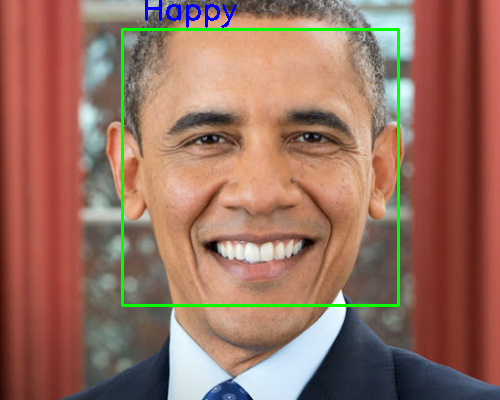

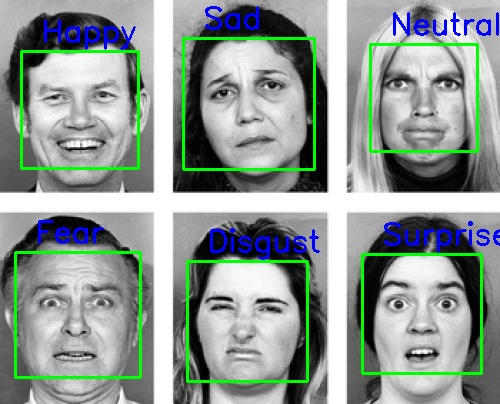

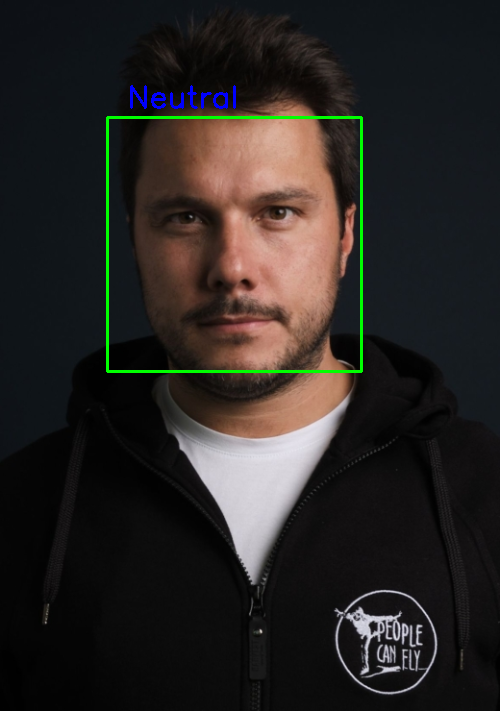

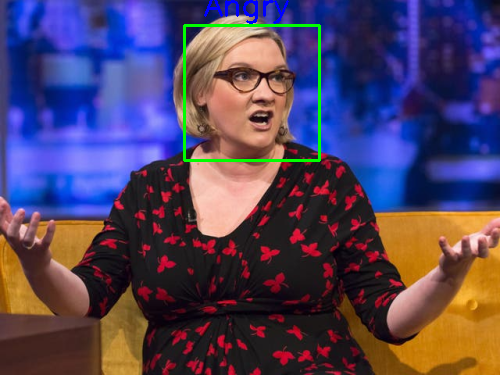

In [14]:
for image_url in image_list:
  image, gray, face_boundries = detect_faces(image_url=image_url)
  #predictions
  predicted_labels = predict_labels(gray,face_boundries)
  # show reults
  show_results(image, face_boundries, predicted_labels)
  print("\n\n")